# Energy Systems MILP Case Study (Green)

__author__ = "Rahul Kakodkar"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.0.5"
__maintainer__ = "Rahul Kakodkar"
__email__ = "cacodcar@tamu.edu"
__status__ = "Production"


The following case study considers three locations along with their fluctuating local demand, weather profiles (capacity factors), and resource (natural gas) prices.

The following processes are considered - 

- Modular nuclear reactors (ASMR)
- Proton Exchange Membrane Electrolyzers (PEM)
- Hydrogen Storage (H2_L_c/H2_L_d)
- Natural Gas Combined Cycle with 95% carbon capture (NGCC)
- Pumped Storage Hydropower (PSH/PSH_discharge)
- Lithium-ion batteries (LiI/LiI_discharge)
- Solar Photovoltaics (PV) 
- Wind Farms (WF)
- Steam Methane Reforming (SMR)
- SMR + Carbon Capture Utilization and Storage (SMRH)
- Hydrogen Fuel Cells (H2FC)
- Direct Air Capture (DAC)
- Offshore Aquifers (AQoff)

The stated processes utilize the following resources:

- Methane (CH4)
- Carbon Dioxide (CO2)
- CO2 in aquifer (CO2_AQoff)
- CO2 Captured from air (CO2_DAC)
- Vented CO2 (CO2_Vent)
- Hydrogen (H2)
- Water (H2O)
- Stored hydrogen (H2_L)
- Power stored in LiI (LiI_Power)
- Oxygen (O2)
- Power stored in PSH (PSH_Power)
- Power
- Solar
- Uranium
- Wind


## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods p

$\mathcal{B}$ - set of transport modes b

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}$ - set of temporal periods p

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

## MILP Formulation



\begin{equation}
    min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} \alpha \times Capex_{l,p,t} \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
    \sum_{b \in \mathcal{B}} \Big(\sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t} Trans^{in}_{b,l,l',r,t} + \sum_{t \in \mathcal{T}^{sch}} \sum_{l \in \mathcal{L}} Trans^{cost}_{b,r,t}Trans^{out}_{b,l,l',r,t} \Big)
\end{equation*}

\begin{equation*}
    + \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
    Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
    Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
    P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
    Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
    - S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
    C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}


\begin{equation}
    Trans^{in/out}_{b, l, l', r,t} \leq Trans^{max-in/out}_{b, l,l', r,t} \times X^B_{b,l,l',r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch} , (l,l') \in \mathcal{L}^2, b \in \mathcal{B} 
\end{equation}


\begin{equation}
    \sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} + \sum_{l' \in \mathcal{L} \cap {l}}Trans^{in}_{l,l',r,t} = \sum_{l' \in \mathcal{L} \cap {l}} Trans^{out}_{l,l',r,t} + Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
    \forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
    S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Trans^{in/out}_{b,l,l',r,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [1]:
import sys
sys.path.append('../../src')

In [2]:

from energiapy.components.result import Result
import pandas
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.plot import plot_results, plot_scenario, plot_location
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results, calculate_hourly
from energiapy.components.transport import Transport
from energiapy.components.scenario import Scenario
from energiapy.components.network import Network
from energiapy.components.location import Location
from energiapy.components.material import Material
from energiapy.components.case_study import CaseStudy
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.temporal_scale import TemporalScale
import numpy
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.aggregation.reduce_scenario import reduce_scenario, Clustermethod
from energiapy.aggregation.ahc import agg_hierarchial_elbow, IncludeAHC, Fit


## Data Import

The following data is needed for the model

- solar and wind profiles : energiapy.fetch_nsrdb_data imports data from the NREL NSRDB database
- power demand : ERCOT for Houston
- Natural Gas prices: Henry Hub 


In [3]:
horizon = 1

### Weather data

The fetch_nsrdb function accesses the [National Solar Radiation Database (NSRDB)](https://nsrdb.nrel.gov/) hosted by NREL on a Amazon Web Services (AWS) cloud through the h5py module To access large datasets, an API key can be requested from NREL.

download data at any latitude longitude (globally) or state-county (because of repetition of county names) pairs within the US.

Skim and fetch data which match different specifications, e.g. wind data for collection point at the highest elevation in the county.

While HSDS allows you to splice datasets, the script allows you to also find means within ranges.

Arrange data in a dataframe for multiscale analysis, with the temporal indices as tuples. [Can be saved as .csv/.txt/.json/.pkl]

Here, we import solar data as dni and wind data as wind speed for most populated data point in Harris county (TX) and San Diego county (SD) at an hourly resolution

#### San Diego

In [4]:
# fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016 , state='California',
#                                     county='San Diego', resolution='hourly', get='min-elevation')

In [5]:
# weather_sandiego = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i , state='California',
#                                     county='San Diego', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# index = weather_sandiego.index
# weather_sandiego.index = pandas.to_datetime(weather_sandiego.index, utc = True)
# weather_sandiego.index = weather_sandiego.index.strftime('%m/%d/%Y, %r')
# weather_sandiego = weather_sandiego[~weather_sandiego.index.str.contains('02/29')]


#### Houston

In [6]:

# weather_houston = pandas.concat([fetch_nsrdb_data(attrs=['dni', 'dhi', 'wind_speed', 'ghi', 'air_temperature', 'dew_point', 'relative_humidity', 'surface_pressure'], year=2016+i, state='Texas',
#                                    county='Harris', resolution='hourly', get='min-elevation')[1] for i in range(5)])
# weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)
# weather_houston.index = weather_houston.index.strftime('%m/%d/%Y, %r')
# weather_houston = weather_houston[~weather_houston.index.str.contains('02/29')]


In [7]:

# weather_houston.to_csv('weather_houston.csv')
# weather_sandiego.to_csv('weather_sandiego.csv')


**OR**

Import from existing datasets. The data in this case has been downloaded from the NSRDB Viewer

In [8]:
coord_houston = (29.56999969482422, -95.05999755859375)
weather_houston = pandas.read_csv('../data/weather_houston.csv', index_col=0)
weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)


C:\Users\cacodcar\AppData\Local\Temp\ipykernel_7360\2873207647.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weather_houston.index = pandas.to_datetime(weather_houston.index, utc = True)


In [9]:
solar_houston = solar_power_output(data= weather_houston, coord=coord_houston, sam = 'cecmod', module_params= 'Canadian_Solar_Inc__CS5P_220M', 
                                   inverter = 'cecinverter', inverter_params= 'ABB__MICRO_0_25_I_OUTD_US_208__208V_', 
                                   temperature_params= 'open_rack_glass_glass', aoi_model= 'no_loss', ac_model= 'sandia', spectral_model= 'no_loss')

In [10]:
wind_houston = wind_power_output(data= weather_houston, roughness_length= 0.1, turbine_type= 'V100/1800', hub_height= 92, 
                                 wind_speed_model= 'logarithmic', density_model = 'ideal_gas', temperature_model = 'linear_gradient', 
                                 power_output_model = 'power_coefficient_curve', density_correction = True, obstacle_height = 0, 
                                 observation_height = 10)

### Natural gas prices

Natural gas prices are from the Henry price index at a daily temporal resolution.

The energia.make_henry_price_df function implicitly fills in gaps in data such as weekends and public holidays by repeating the last recorded prices For e.g. if the 4th of July will use the price for the 3rd of July a typical saturday and sunday will take the values for the last friday.

The stretch functionality stretches the values over the hourly temporal scale (8760) from a daily temporal scale (365), again through repetition.

Moreover, we can remove outliers usig the remove_outliers features in data_utils

In [11]:
ng_price_df = pandas.concat(
    [make_henry_price_df(file_name='../data/Henry_Hub_Natural_Gas_Spot_Price_Daily.csv', year=2016 +i, stretch= True) for i in range(5)]) #, 

### Demand data

Get [hourly power demand data](https://www.ercot.com/gridinfo/load/load_hist)  for Houston from ERCOT Coastal region

In [12]:
ercot = pandas.read_csv('../data/ercot.csv', index_col=0)
ercot.index = pandas.to_datetime(ercot.index, utc = True)
ercot.loc['2016-11-06 23:00:00'] = ercot.loc['2016-11-06 22:00:00'] #random missing value

C:\Users\cacodcar\AppData\Local\Temp\ipykernel_7360\3085676995.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ercot.index = pandas.to_datetime(ercot.index, utc = True)


## Define temporal scale


The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.

In [13]:
scales = TemporalScale(discretization_list=[horizon, 365, 24])


**Big and small M**

In [14]:
bigM = 10**6
smallM = 0

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold). Resources measured as mass (sparing Uranium) are quantified on a per metric ton basis, energy feedstock and resources us a Mega Watt (MW) basis.

- Power and Hydrogen (H2) have varying demands which are captured using deterministic data inputs
- Methane (CH4) has varying purchase price

In [15]:

Solar = Resource(name='Solar', cons_max=1000, basis='MW', label='Solar Power')

Wind = Resource(name='Wind', cons_max=1000, basis='MW', label='Wind Power')

# Power = Resource(name='Power', basis='MW', label='Power generated', demand = True, varying= [VaryingResource.DETERMINISTIC_DEMAND])

Power = Resource(name='Power', basis='MW', label='Power generated')

Uranium = Resource(name='Uranium', cons_max=1000,
                   price=42.70/(250/2), basis='kg', label='Uranium')

H2 = Resource(name='H2', basis='tons', label='Hydrogen')

H2_C = Resource(name='H2(C)', basis='tons', label='Hydrogen(C)', demand = True, revenue = 0.07)

CO2_AQoff = Resource(name='CO2_AQoff', basis='tons',
                     label='Carbon dioxide - sequestered', sell = True)

H2O = Resource(name='H2O', cons_max=1000,
               price=3.00, basis='tons', label='Water', block='Resource')

CH4 = Resource(name='CH4', cons_max=1000, price=max(ng_price_df['CH4'])*1000, basis='tons',
               label='Natural gas', varying=[VaryingResource.DETERMINISTIC_PRICE])

CO2 = Resource(name='CO2', basis='tons',
               label='Carbon dioxide', block='Resource')

CO2_Vent = Resource(name='CO2_Vent', sell=True, basis='tons',
                    label='Carbon dioxide - Vented')

O2 = Resource(name='O2', sell=True, basis='tons', label='Oxygen')

CO2_DAC = Resource(name='CO2_DAC', basis='tons',
                   label='Carbon dioxide - captured')

LiI_Power = Resource(name='LiI_Power', basis='MW',
                     label='Power in LiI', store_max=10000, store_min=smallM)

PSH_Power = Resource(name='PSH_Power', basis='MW',
                     label='Power in PSH', store_max=10000, store_min=smallM)



## Declare processes

Technology costs are derived from the NREL ATB and conversion factors are derived from literature.

- Solar photovoltaics (PVs) and wind farms (WFs) are subject to intermittent capacity rates

In [16]:

PEM = Process(name='PEM', conversion={Power: -1, H2: 0.3537, O2: 2.8302, H2O: -3.1839}, capex=1.55*10**6, fopex=0,
              vopex=0, prod_max=100, prod_min = 0, basis = 'tons', label = 'PEM' )

LiI = Process(name='LiI', storage=Power, capex=1302182, fopex=41432, vopex=0,
              prod_max=100, prod_min=0, store_max=10000, label='Lithium-ion battery', basis='MW')


# LiI = Process(name='LiI', conversion={Power: -1, LiI_Power: 1}, capex=1302182, fopex=41432, vopex=2000,
#               store_max=10000, store_min=smallM, prod_max=bigM, prod_min=smallM, label='Lithium-ion battery', basis='MW', block='energy_storage')

# LiI_discharge = Process(name='LiI_discharge', conversion={Power: 1, LiI_Power: -1}, capex=0.1,
#                         fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Lithium-ion battery (d)', basis='MW')

WF = Process(name='WF', conversion={Wind: -1, Power: 1}, capex=1462000, fopex=43000, vopex=0, land = 10800/1800,
             prod_max=1000, prod_min=0, label='Wind mill array', varying=[VaryingProcess.DETERMINISTIC_CAPACITY], basis='MW')

PV = Process(name='PV', conversion={Solar: -1, Power: 1}, capex=1333262, fopex=22623, vopex=0,  land = 10000/1800,
             prod_max=1000, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

H2_Comp = Process(name='H2_Comp', conversion={Power: -0.417, H2_C: 1, H2: -1}, capex=1.6 *
                 10**6, vopex=0, fopex=0, prod_max=10000, prod_min=0,  label='Hydrogen Compression')

SMRH = Process(name='SMRH', conversion={Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 1.03, CO2: 9.332}, capex=2520000, fopex=945000, vopex=51.5,
               prod_max=bigM, prod_min=smallM,  label='Steam methane reforming + CCUS', block='h2_prod')

NGCC = Process(name='NGCC', conversion={Power: 1, CH4: -0.108, CO2_Vent: 0.297*0.05, CO2: 0.297 *
               0.95}, capex=2158928, fopex=53320, vopex=4090, prod_max=bigM, prod_min=smallM,  label='NGCC + 95% CC', block='power_gen')

SMR = Process(name='SMR', capex=2400, fopex=800, vopex=0.03,  conversion={
              Power: -1.11, CH4: -3.76, H2O: -23.7, H2: 1, CO2_Vent: 9.4979}, prod_max=bigM, prod_min=0.01,  label='Steam methane reforming', block='h2_prod')

DAC = Process(name='DAC', capex=0.02536, fopex=0.634, vopex=0, conversion={
              Power: -0.193, H2O: -4.048, CO2_DAC: 1}, prod_max=bigM, prod_min=smallM,  label='Direct air capture', block='ccus')

PSH = Process(name='PSH', conversion={Power: -1, PSH_Power: 1},  capex=3924781,
              fopex=17820, vopex=512.5, prod_max=bigM, prod_min=smallM, store_min=smallM, store_max=1000, label='Pumped storage hydropower', basis='MW', block='energy_storage')

PSH_discharge = Process(name='PSH_discharge', conversion={Power: 1, PSH_Power: -1},  capex=0.1,
                        fopex=0.01, vopex=0, prod_max=bigM, prod_min=smallM,  label='Pumped storage hydropower (d)', basis='MW')

ASMR = Process(name='ASMR', conversion={Uranium: -4.17*10**(-5), H2O: -3.364, Power: 1},
               capex=7988951, fopex=0.04*0.730, vopex=0, prod_max=bigM, prod_min=smallM, label='Small modular reactors (SMRs)', block='power_gen')

AqOff = Process(name='AqOff', conversion={Power: -1.50, CO2_AQoff: 0.95, CO2: -1}, capex=552000,
                vopex=4140, fopex=0, prod_max=bigM, prod_min=smallM,   label='Offshore aquifer CO2 sequestration (SMR)', block='ccus')



**Declare location (houston)**

The following deterministic data inputs are provide:

1. demand factors for Power and Hydrogen (H2) at an hourly resolution (demand_scale_level = 2)
2. price factors for Methane (CH4) at a daily resolution (price_scale_level = 1)
3. capacity factors for solar photovoltaics (PV) and wind farms (WF) at an hourly resolution (capacity_scale_level = 2)
4. capex, fopex, and vopex factors at an annual resolution for all processes (expenditure_scale_level = 0)


In [17]:
location_generation = Location(name='generation', processes= {PV, WF, LiI}, 
                               capacity_factor={PV: solar_houston[:8760], WF: wind_houston[:8760]}, 
                               scales=scales, label='site for generation', expenditure_scale_level=0, 
                               demand_scale_level=2, capacity_scale_level=2, price_scale_level=2)

location_production = Location(name='production', processes= {PEM}, price_factor={
                   CH4: ng_price_df[:8760]}, scales=scales, label='site for production', 
                               expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=2)

location_consumption = Location(name='consumption', processes= {H2_Comp}, scales=scales, label='site for production', 
                                expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=2)

location_sequestration = Location(name='sequestration', processes= {AqOff}, scales=scales, label= 'site for sequestration', 
                                  expenditure_scale_level=0, demand_scale_level=2, capacity_scale_level=2, price_scale_level=2)

In [18]:

H2_pipeline = Transport(name= 'hydrogen', resources= {H2}, trans_max= bigM, trans_loss= 0.01, trans_cost= 2
    , label= 'Pipeline for hydrogen transportation')

CO2_pipeline = Transport(name= 'carbon', resources= {CO2}, trans_max= bigM, trans_loss= 0.01, trans_cost= 1
    , label= 'Pipeline for carbon dioxide transportation')

Grid = Transport(name= 'Grid', resources= {Power}, trans_max= bigM, trans_loss= 0.01, trans_cost= 0.5, label= 'Power Transmission')


In [19]:

distance_matrix = [
    [20, 45, 100],
    [0, 60, 50]
            ]

transport_matrix = [
    [[Grid], [Grid, CO2_pipeline], [Grid]],
    [[],[CO2_pipeline], [H2_pipeline]], 
                   ]

network = Network(name= 'Network', source_locations= [location_generation, location_production], 
                  sink_locations= [location_production, location_sequestration, location_consumption], 
                  distance_matrix= distance_matrix, transport_matrix= transport_matrix) 



Location level plots

In [20]:
# plot_location.capacity_factor(process=PV, location=location_generation)
# plot_location.capacity_factor(process=WF, location=location_generation)
# plot_location.price_factor(resource=CH4, location=location_production)
# # plot_location.demand_factor(resource=Power, location=houston)

# plot_location.capacity_factor(process=PV, location=location_generation_max)
# plot_location.capacity_factor(process=WF, location=location_generation_max)

**Declare scenario**

The demand needs to be stated here for each resource at location.
energiapy handles demand not stated at a per location level by meeting the demand across all locations
Similarly, if resources are not stated the demand is met using all resources with demand (Process.demand = True). This does not make sense for resources with different basis but might be useful if the model needs to meet the demand for similar resources from different sources.

The scales need to be stated here to help generate the scenario:

1. expenditure scale level - technology expenditure decisions 
2. scheduling scale level - scheduling decisions such as production levels for process; purchase, discharge (sale), consumption, and inventory levels for resources  
3. network scale level - design of network i.e. the location and capacity sizing of production and storage facilities on a per unit basis
4. demand scale level - to meet the demand of a resource. Note that if this is higher than the scale for demand factor at location, energiapy will sum the demand across the lower scale
5. purchase scale level - purchase of resources that can be consumed. Needs to match the price scale level at location level

In [21]:

locset = [location_production, location_generation, location_sequestration, location_consumption]
demand_dict = {i: {H2_C: 1} if i == location_consumption else {H2_C: 0} for i in locset}


# scenario = Scenario(name='scenario_full', network=network, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=2,
#                     network_scale_level=0, demand_scale_level=2, purchase_scale_level=1, capacity_scale_level = 2, label='full_case', demand= demand_dict, annualization_factor = 0.15)


In [22]:

scenario = Scenario(name='scenario_green', network=network, scales=scales,  expenditure_scale_level=0, scheduling_scale_level=2,
                    network_scale_level=0, demand_scale_level=2, purchase_scale_level=1, capacity_scale_level = 2, label='full_case', demand=demand_dict, annualization_factor = 0.15)


In [23]:
casestudy = CaseStudy(name = 'casestudy', scenarios= [scenario])

In [24]:
casestudy.scenarios

[scenario_green]

In [25]:
inventory_zero = {i: {(LiI, Power): 25} if i == location_generation else {(LiI, Power): 0} for i in locset}

In [26]:
casestudy.formulate(constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.DEMAND, Constraints.TRANSPORT}, objective=Objective.COST)

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint production mode
constraint inventory balance
constraint transport export
constraint transport import
constraint transport exp UB
constraint transport imp UB
constraint transport balance
constraint transport imp cost
constraint transport cost
constraint transport cost network
constraint demand
objective cost


{'scenario_green': <pyomo.core.base.PyomoModel.ConcreteModel at 0x1b02e8c8e50>}

In [27]:
results = casestudy.solve(solver='gurobi', print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6700 CPU @ 3.40GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 3031239 rows, 3180161 columns and 5994740 nonzeros
Model fingerprint: 0xce45ebdd
Variable types: 3180143 continuous, 18 integer (18 binary)
Coefficient statistics:
  Matrix range     [2e-05, 1e+06]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+06]
Presolve removed 2981565 rows and 3138280 columns
Presolve time: 3.67s
Presolved: 49674 rows, 41881 columns, 133427 nonzeros
Variable types: 41881 continuous, 0 integer (0 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing first log only...


Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    4223    5.4770902e+08   0.000000e+00   1.240415e+07      5s
Concur

In [28]:
# results_dict = {i.name: solve(scenario=i, instance=milp_dict[i.name], solver='gurobi',
#                      name=f"results_master", print_solversteps=True, saveformat = '.pkl') for i in [scenario, scenario_max, scenario_min, scenario_mean]}

9570757.723487461

In [29]:
results.results['scenario_green'].output['objective']

9570757.723487461

In [30]:
results.results['scenario_green'].divide_objective_by('S_network',('H2(C)', 0))

1092.5522515396647

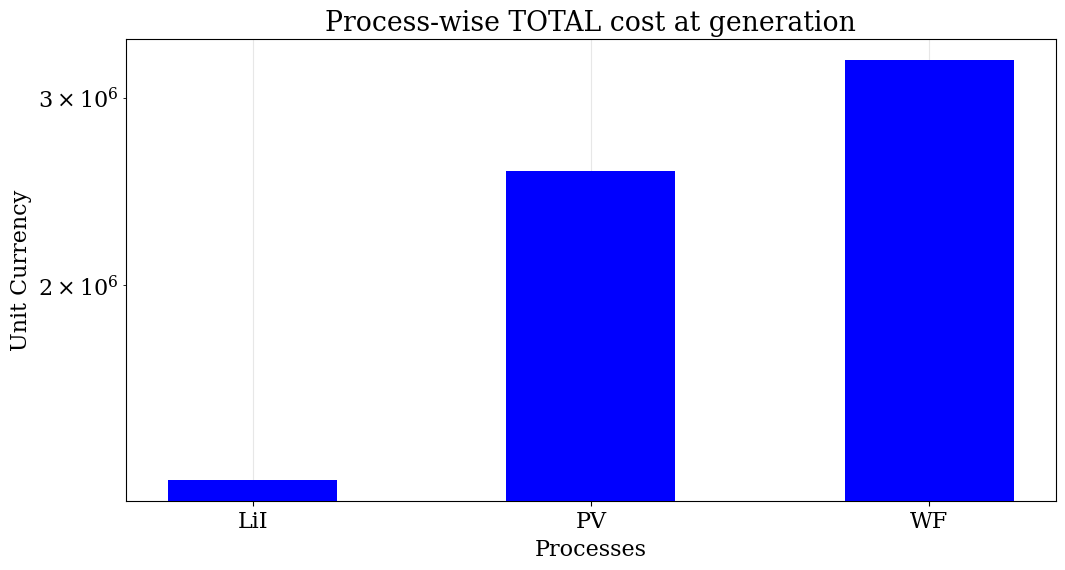

In [31]:
plot_results.cost(results=results.results['scenario_green'], x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='generation', fig_size=(12, 6))

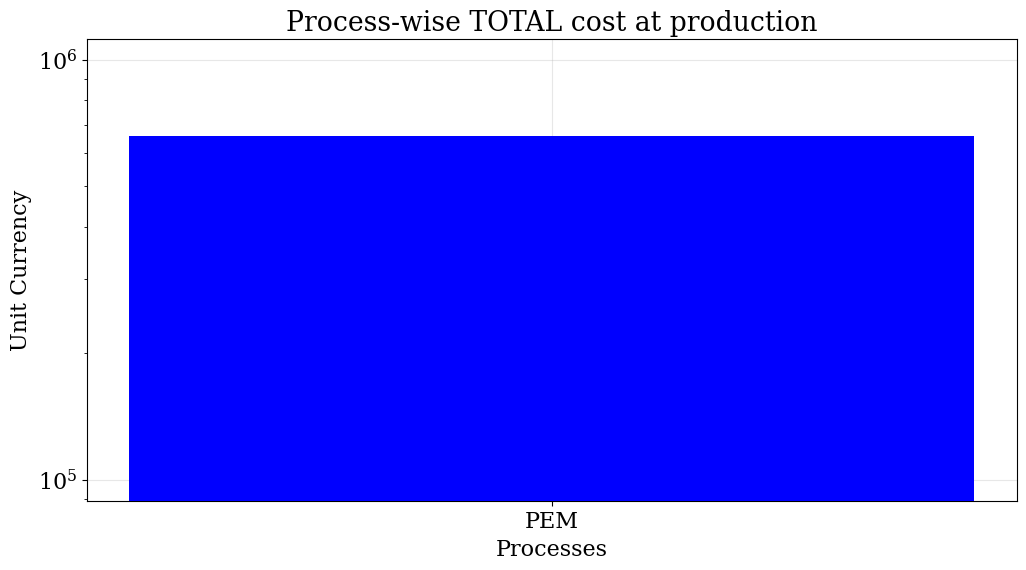

In [32]:
plot_results.cost(results=results.results['scenario_green'], x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='production', fig_size=(12, 6))

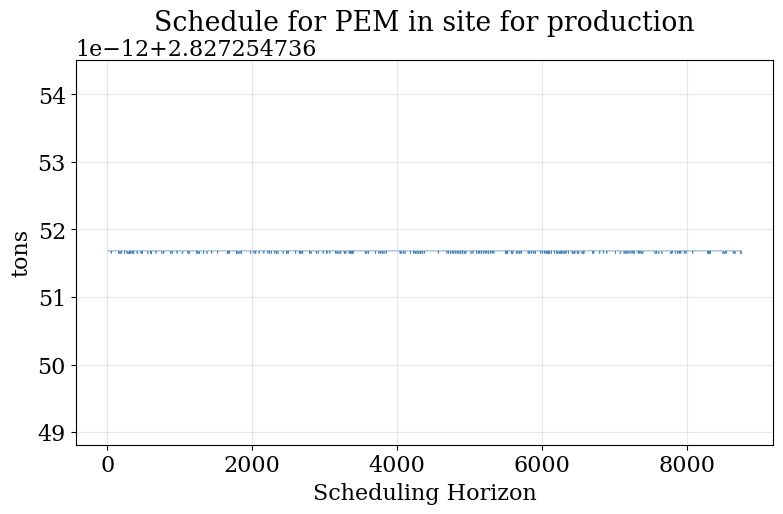

In [33]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='P', component='PEM',
                      location='production', fig_size=(9, 5), color='steelblue')

In [34]:
results.results['scenario_green'].output['S_network']

{('CO2_AQoff', 0): 0.0,
 ('H2(C)', 0): 8759.999999999998,
 ('O2', 0): 70094.86005089107}

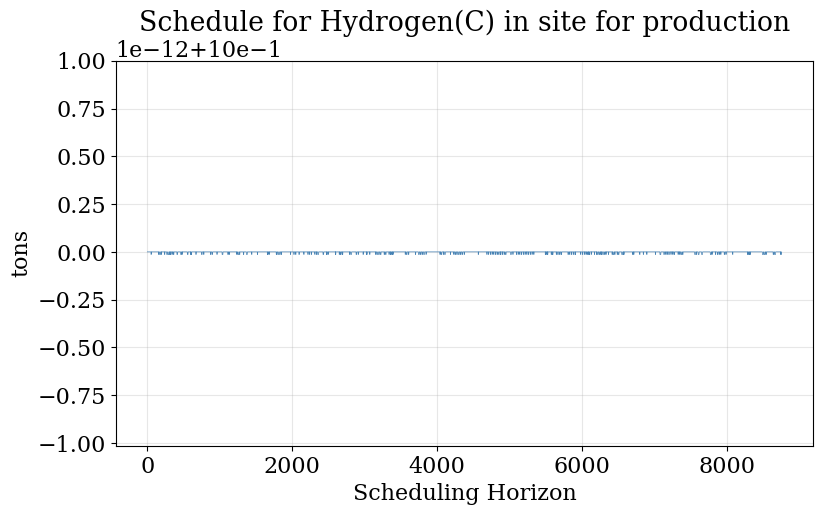

In [35]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='S', component='H2(C)',
                      location='consumption', fig_size=(9, 5), color='steelblue')

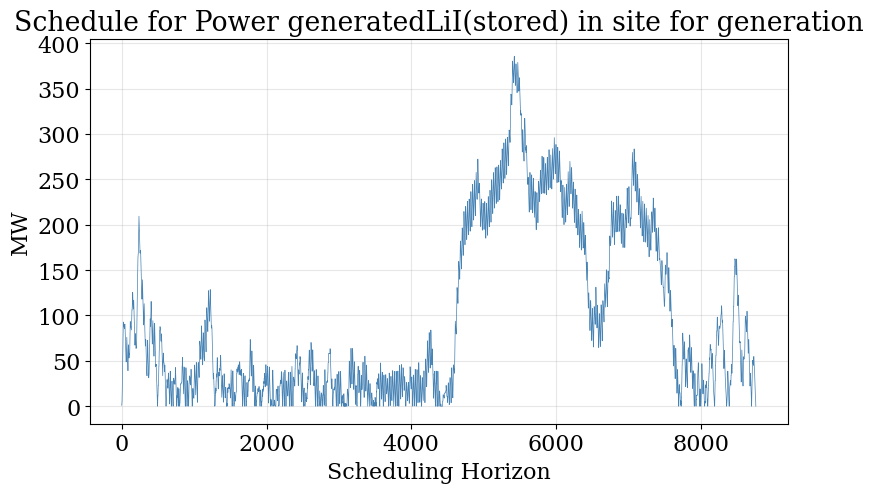

In [36]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='Inv', component='LiI_Power_stored',
                      location='generation', fig_size=(9, 5), color='steelblue')

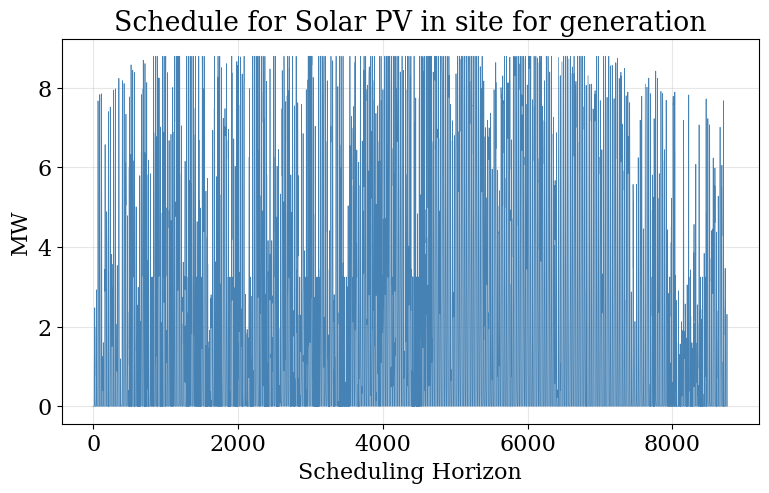

In [37]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='P', component='PV',
                      location='generation', fig_size=(9, 5), color='steelblue')

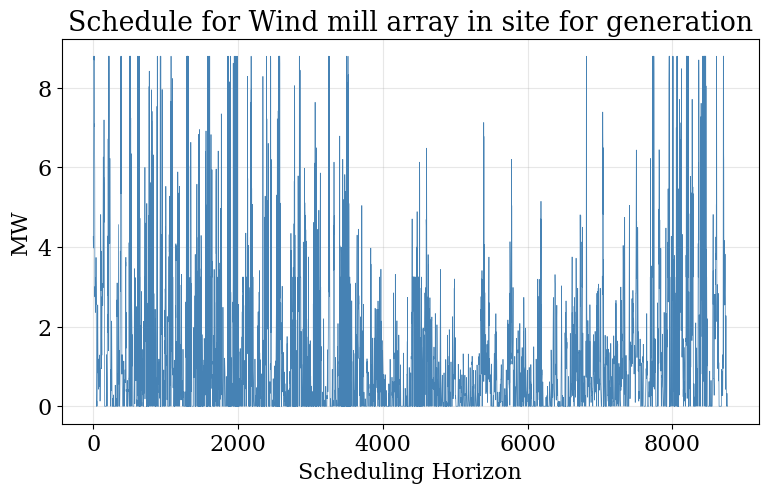

In [38]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='P', component='WF',
                      location='generation', fig_size=(9, 5), color='steelblue')

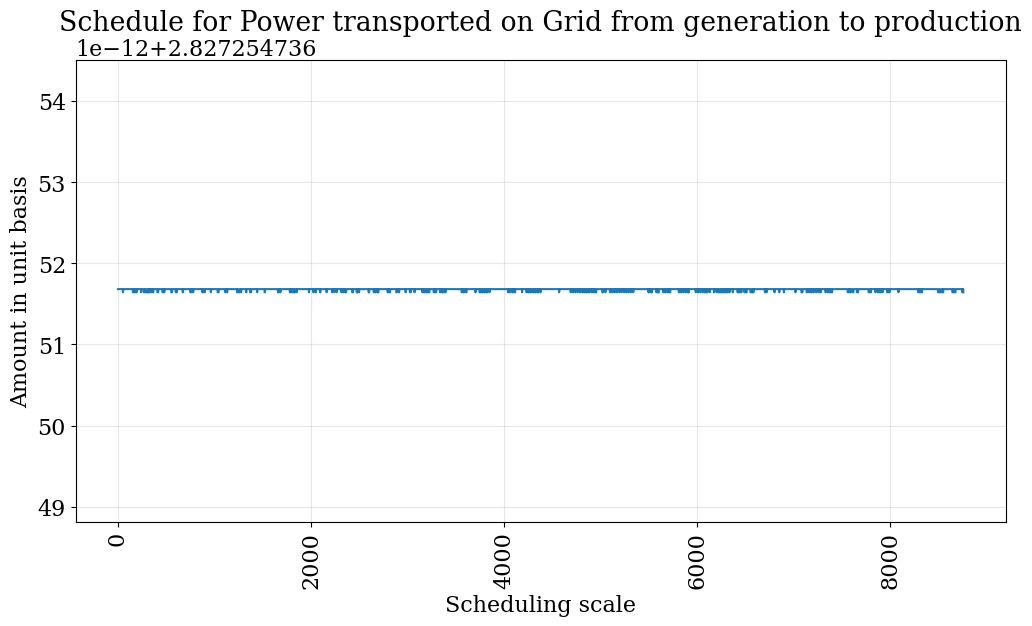

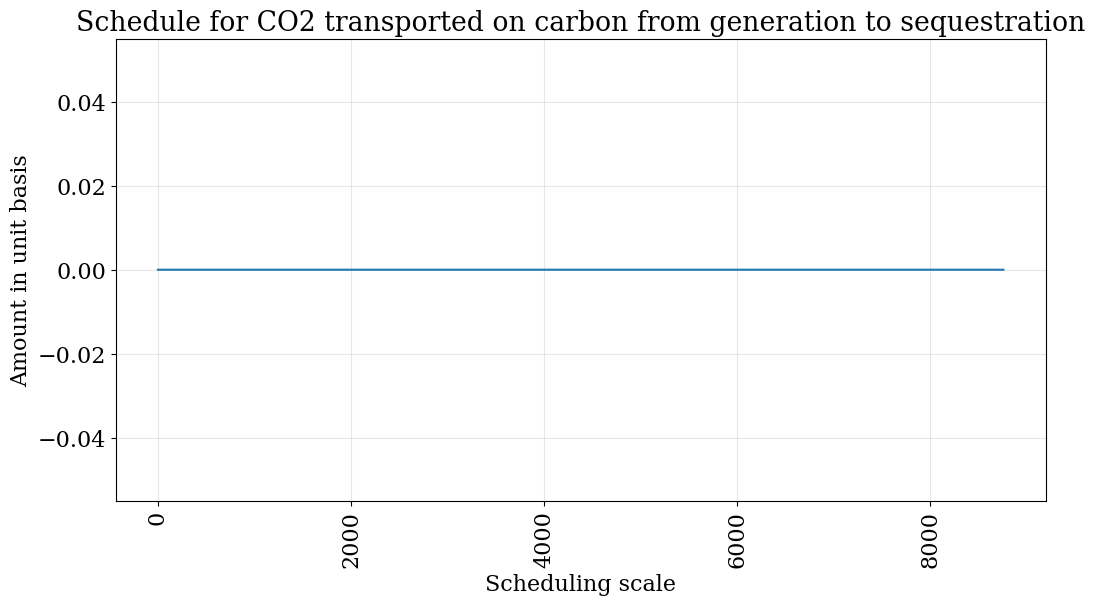

In [39]:
plot_results.transport(results=results.results['scenario_green'], source='generation', sink='production', resource='Power', transport='Grid')
plot_results.transport(results=results.results['scenario_green'], source='generation', sink='sequestration', resource='CO2', transport='carbon')


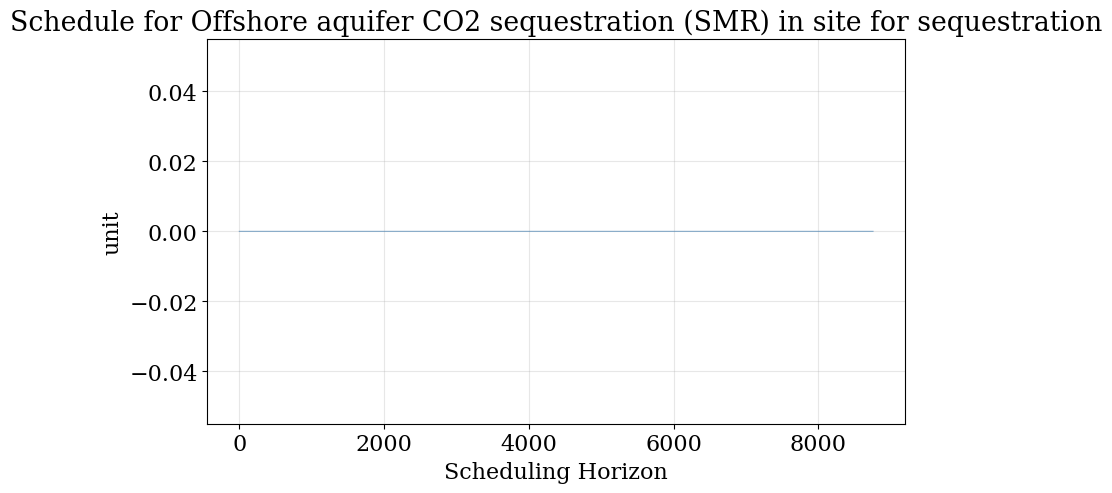

In [40]:
plot_results.schedule(results=results.results['scenario_green'], y_axis='P', component='AqOff',
                      location='sequestration', fig_size=(9, 5), color='steelblue')

In [41]:
scenario.transport_avail_dict

{('generation', 'production'): {'Grid'},
 ('generation', 'sequestration'): {'Grid', 'carbon'},
 ('generation', 'consumption'): {'Grid'},
 ('production', 'production'): set(),
 ('production', 'sequestration'): {'carbon'},
 ('production', 'consumption'): {'hydrogen'}}

In [42]:
capex = results.results['scenario_green'].output['Capex_network'][0]*scenario.annualization_factor
fopex = results.results['scenario_green'].output['Fopex_network'][0]
vopex = results.results['scenario_green'].output['Vopex_network'][0]
trans = sum(results.results['scenario_green'].output['Trans_cost'].values())

In [43]:
capex, fopex, vopex, trans

(1050582.9635106456, 1023993.2050874128, 0.0, 1306313.5148431507)

In [44]:
results.results['scenario_green'].output['Vopex_process']

{('consumption', 'AqOff', 0): 0.0,
 ('consumption', 'H2_Comp', 0): 0.0,
 ('consumption', 'LiI', 0): 0.0,
 ('consumption', 'LiI_discharge', 0): 0.0,
 ('consumption', 'PEM', 0): 0.0,
 ('consumption', 'PV', 0): 0.0,
 ('consumption', 'WF', 0): 0.0,
 ('generation', 'AqOff', 0): 0.0,
 ('generation', 'H2_Comp', 0): 0.0,
 ('generation', 'LiI', 0): 0.0,
 ('generation', 'LiI_discharge', 0): 0.0,
 ('generation', 'PEM', 0): 0.0,
 ('generation', 'PV', 0): 0.0,
 ('generation', 'WF', 0): 0.0,
 ('production', 'AqOff', 0): 0.0,
 ('production', 'H2_Comp', 0): 0.0,
 ('production', 'LiI', 0): 0.0,
 ('production', 'LiI_discharge', 0): 0.0,
 ('production', 'PEM', 0): 0.0,
 ('production', 'PV', 0): 0.0,
 ('production', 'WF', 0): 0.0,
 ('sequestration', 'AqOff', 0): 0.0,
 ('sequestration', 'H2_Comp', 0): 0.0,
 ('sequestration', 'LiI', 0): 0.0,
 ('sequestration', 'LiI_discharge', 0): 0.0,
 ('sequestration', 'PEM', 0): 0.0,
 ('sequestration', 'PV', 0): 0.0,
 ('sequestration', 'WF', 0): 0.0}

In [46]:
casestudy.formulations['scenario_green'].constraint_process_vopex.pprint()

constraint_process_vopex : total vopex from network
    Size=28, Index=constraint_process_vopex_index, Active=True
    Key                                   : Lower : Body                                                                                       : Upper : Active
              ('consumption', 'AqOff', 0) :   0.0 :                  Vopex_process[consumption,AqOff,0] - 4140*P_location[consumption,AqOff,0] :   0.0 :   True
            ('consumption', 'H2_Comp', 0) :   0.0 :                 Vopex_process[consumption,H2_Comp,0] + 0*P_location[consumption,H2_Comp,0] :   0.0 :   True
                ('consumption', 'LiI', 0) :   0.0 :                         Vopex_process[consumption,LiI,0] + 0*P_location[consumption,LiI,0] :   0.0 :   True
      ('consumption', 'LiI_discharge', 0) :   0.0 :     Vopex_process[consumption,LiI_discharge,0] + 0*P_location[consumption,LiI_discharge,0] :   0.0 :   True
                ('consumption', 'PEM', 0) :   0.0 :                         Vopex_pro

In [47]:
casestudy.formulations['scenario_green'].constraint_location_vopex.pprint()

constraint_location_vopex : sums up vopex from process over a locations
    Size=4, Index=constraint_location_vopex_index, Active=True
    Key                  : Lower : Body                                                                                                                                                                                                                                                                                                               : Upper : Active
      ('consumption', 0) :   0.0 :                 Vopex_location[consumption,0] - (Vopex_process[consumption,AqOff,0] + Vopex_process[consumption,H2_Comp,0] + Vopex_process[consumption,LiI,0] + Vopex_process[consumption,LiI_discharge,0] + Vopex_process[consumption,PEM,0] + Vopex_process[consumption,PV,0] + Vopex_process[consumption,WF,0]) :   0.0 :   True
       ('generation', 0) :   0.0 :                         Vopex_location[generation,0] - (Vopex_process[generation,AqOff,0] + Vopex_process[genera